## Описание проекта

* Необходимо, используя таблицу поездок для каждого дня рассчитать процент поездок по количеству человек в машине (без пассажиров, 1, 2,3,4 и более пассажиров). 
* По итогу должна получиться таблица (parquet) с колонками date, percentage_zero, percentage_1p, percentage_2p, percentage_3p, percentage_4p_plus.
* Также добавить столбцы к предыдущим результатам с самой дорогой и самой дешевой поездкой для каждой группы.
* также провести аналитику и построить график на тему “как пройденное расстояние и количество пассажиров влияет на чаевые” в любом удобном инструменте.

### Описание данных

* VendorId - ИД компании
* Trep_pickup_datetime - Время и дата, когда пассажир сел в такси
* Trep_dropoff_datetime - Время и дата, когда пассажир вышел из такси
* Passanger_count - Количество пассажиров
* Trip_distance - Пройденное расстояние
* Ratecodeid - Код скорости
* Store_and_fwd_flag - Флаг, отвечающий за сохранение записи поездки перед ее отправкой поставщику
* PulocationId - Широта, где была начата поездка
* Dolocationid - Долгота, где была начата поездка
* Payment_type - Тип оплаты
* Fare_amount - Стоимость поездки
* Mta_tax - Комиссия автопарка
* Tip_amount - Чаевые
* Tools_amount - Оплата за платные дороги
* Improvement_surchange - Доплата за страховку
* Total_amount - Полная стоимость поездки
* Congestion_surchange - Дополнительный сбор 

## Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.1f}'.format)

## Работа с данными

Создание функции, показывающей информацию о данных, наличие дубликатов и пропусков в датафрейме.

In [3]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

def dataframe(data):
    return display(data.head(),
                   data.info(),
                   data.describe(),
                   data.duplicated().sum(),
                   pd.concat([data.isna().sum(),
                              data.isna().mean()],
                             axis=1)
                   .rename(columns={0:'кол-во', 1:'доля'})
                   .style.format({'кол-во':'{:.0f}', 'доля':'{:.1%}'})
                  )
dataframe(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.5,0.0,0.3,11.3,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.5,0.0,0.3,12.3,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.0,0.0,0.3,10.8,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.4,0.0,0.3,8.2,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0


None

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,"6,339,567.0","6,339,567.0","6,405,008.0","6,339,567.0","6,405,008.0","6,405,008.0","6,339,567.0","6,405,008.0","6,405,008.0","6,405,008.0","6,405,008.0","6,405,008.0","6,405,008.0","6,405,008.0","6,405,008.0"
mean,1.7,1.5,2.9,1.1,164.7,162.7,1.3,12.7,1.1,0.5,2.2,0.3,0.3,18.7,2.3
std,0.5,1.2,83.2,0.8,65.5,69.9,0.5,12.1,1.3,0.1,2.8,1.8,0.0,14.8,0.7
min,1.0,0.0,-30.6,1.0,1.0,1.0,1.0,"-1,238.0",-27.0,-0.5,-91.0,-35.7,-0.3,"-1,242.3",-2.5
25%,1.0,1.0,1.0,1.0,132.0,113.0,1.0,6.5,0.0,0.5,0.0,0.0,0.3,11.2,2.5
50%,2.0,1.0,1.6,1.0,162.0,162.0,1.0,9.0,0.5,0.5,1.9,0.0,0.3,14.3,2.5
75%,2.0,2.0,2.9,1.0,234.0,234.0,2.0,14.0,2.5,0.5,2.9,0.0,0.3,19.8,2.5
max,2.0,9.0,"210,240.1",99.0,265.0,265.0,5.0,"4,265.0",113.0,30.8,"1,100.0",910.5,0.3,"4,268.3",2.8


12949

,кол-во,доля
VendorID,65441,1.0%
tpep_pickup_datetime,0,0.0%
tpep_dropoff_datetime,0,0.0%
passenger_count,65441,1.0%
trip_distance,0,0.0%
RatecodeID,65441,1.0%
store_and_fwd_flag,65441,1.0%
PULocationID,0,0.0%
DOLocationID,0,0.0%
payment_type,65441,1.0%


### Выводы

* 6405008 записей в данных.
* 12949 дублирующих записей.
* 65441 записей с пропусками в данных, что составляет примерно 1% от всех данных.
* Не менее 50% поездок без пассажиров или с 1 пассажиром.
* Максимальное количество пассажиров 9, что говорит о том, что в данных присутствуют такси-микроавтобусы.
* Средняя дистанция 2.9 км, медианная 1.6км.
* Средний чек 12.7 долларов, медианный 9.0 максимальный 4265. При этом присутствуют отрицательные значения, скорее всего речь идет об убытках компаний, оплаченных ввиду нарушения договора.
* Максимальные чаевые 1100 долларов.

# Работа с пропущенными данными

Уберем из данных дубли и пропуски, ввиду их малой значимости для статистики(1%)

In [4]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [5]:
df = df.dropna()
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6339567 entries, 0 to 6339566
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 919.0+ MB


## Выполнение задания

### Вывод необходимых данных в отдельный датафрейм.

In [7]:
df1 = df[['tpep_pickup_datetime','passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']]

### Преобразование времени поездки в дату

In [8]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.date

### Сводная таблица с датами и процентами относительно количества пассажиров

In [9]:
df = df1.pivot_table(
    index = ['tpep_pickup_datetime'],
    columns = ['passenger_count'],
    values = 'fare_amount',
    aggfunc='count').fillna(0)


df.reset_index(inplace= True )
df.columns = ['date','0','1','2','3','4','5','6','7','8','9']
df['4+'] = df['4']+df['5']+df['6']+df['7']+df['8']+df['9']
df['total'] = df['4+']+df['0']+df['1']+df['2']+df['3']
df['0_%'] = round(df['0']/ df['total']*100, 1)
df['1_%'] = round(df['1']/ df['total']*100, 1)
df['2_%'] = round(df['2']/ df['total']*100, 1)
df['3_%'] = round(df['3']/ df['total']*100, 1)
df['4+_%'] = round(df['4+']/ df['total']*100, 1)
df.head(10).sort_values('date')

,date,0,1,2,3,4,5,6,7,8,9,4+,total,0_%,1_%,2_%,3_%,4+_%
0,2003-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100.0,0.0,0.0,0.0
1,2008-12-31,0.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,0.0,80.0,0.0,10.0,10.0
2,2009-01-01,0.0,15.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,19.0,0.0,78.9,5.3,5.3,10.5
3,2019-12-18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,50.0,0.0,0.0,50.0
4,2019-12-31,0.0,75.0,21.0,6.0,2.0,6.0,19.0,0.0,0.0,0.0,27.0,129.0,0.0,58.1,16.3,4.7,20.9
5,2020-01-01,"2,552.0","107,095.0","32,830.0","9,680.0","5,916.0","6,678.0","3,820.0",1.0,5.0,1.0,"16,421.0","168,578.0",1.5,63.5,19.5,5.7,9.7
6,2020-01-02,"2,715.0","110,334.0","25,654.0","7,592.0","4,641.0","5,696.0","3,658.0",0.0,0.0,1.0,"13,996.0","160,291.0",1.7,68.8,16.0,4.7,8.7
7,2020-01-03,"3,211.0","125,018.0","29,617.0","8,311.0","4,760.0","6,663.0","3,939.0",1.0,0.0,0.0,"15,363.0","181,520.0",1.8,68.9,16.3,4.6,8.5
8,2020-01-04,"3,067.0","119,312.0","33,403.0","9,338.0","5,358.0","7,129.0","4,094.0",4.0,0.0,1.0,"16,586.0","181,706.0",1.7,65.7,18.4,5.1,9.1
9,2020-01-05,"2,756.0","110,379.0","28,286.0","7,786.0","4,275.0","6,134.0","3,417.0",4.0,0.0,1.0,"13,831.0","163,038.0",1.7,67.7,17.3,4.8,8.5


### Максимальный и минимальный положительный чек по датам.

In [10]:
df_pay = df1[df1['fare_amount'] > 0].pivot_table(
    index = ['tpep_pickup_datetime'],
    values = 'fare_amount',
    aggfunc=['max','min']).fillna(0)
df_pay.reset_index(inplace= True)
df_pay.columns = ['date','max','min']
df_pay.head()

,date,max,min
0,2008-12-31,52.0,3.5
1,2009-01-01,74.5,2.5
2,2019-12-18,2.5,0.0
3,2019-12-31,60.0,2.5
4,2020-01-01,400.0,0.0


### Финальная таблица

In [11]:
df_final = df[['date','0_%','1_%','2_%','3_%','4+_%']]
df_final = df_final.merge(df_pay, left_on='date', right_on='date')
df_final.head()

,date,0_%,1_%,2_%,3_%,4+_%,max,min
0,2008-12-31,0.0,80.0,0.0,10.0,10.0,52.0,3.5
1,2009-01-01,0.0,78.9,5.3,5.3,10.5,74.5,2.5
2,2019-12-18,0.0,50.0,0.0,0.0,50.0,2.5,0.0
3,2019-12-31,0.0,58.1,16.3,4.7,20.9,60.0,2.5
4,2020-01-01,1.5,63.5,19.5,5.7,9.7,400.0,0.0


### Влияние пройденного расстояния и количества пассажиров на чаевые

array([[<AxesSubplot:xlabel='trip_distance', ylabel='trip_distance'>,
        <AxesSubplot:xlabel='tip_amount', ylabel='trip_distance'>,
        <AxesSubplot:xlabel='passenger_count', ylabel='trip_distance'>],
       [<AxesSubplot:xlabel='trip_distance', ylabel='tip_amount'>,
        <AxesSubplot:xlabel='tip_amount', ylabel='tip_amount'>,
        <AxesSubplot:xlabel='passenger_count', ylabel='tip_amount'>],
       [<AxesSubplot:xlabel='trip_distance', ylabel='passenger_count'>,
        <AxesSubplot:xlabel='tip_amount', ylabel='passenger_count'>,
        <AxesSubplot:xlabel='passenger_count', ylabel='passenger_count'>]],
      dtype=object)

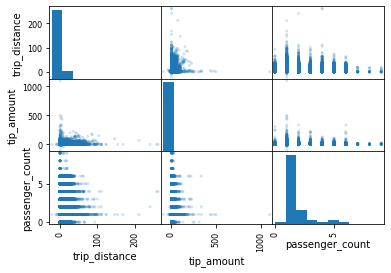

In [13]:
pd.plotting.scatter_matrix(df1[['trip_distance','tip_amount', 'passenger_count']], alpha=0.2);

### Вывод

* Больше всего чаевых оставляют, когда в поездке один пассажир, чем больше пассажиров, тем меньше чаевых.
* По дистанции корреляции скорее нет, наибольшие значения чаевых на короткие расстояния скорее из-за массовости, при увеличении дистанции диаграмма остается ровной, с выбросами в районе 100 км.